Are you a shopkeeper or a customer? Enter '1.shopkeeper' or '2.customer' (Enter '3.exit' to quit):1
Enter password: 1
Access granted.
1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 1
Available products:
      Name  Quantity  Price Category
Id                                  
1    Apple        10    145   fruits
2   Banana        20     33   fruits
3   Orange        15     23   fruits
1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 2
Enter product name: egg
Enter product quantity: 23
Enter product price: 7
Enter product category: groceries
Product added successfully.
1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 3
Enter the CSV file name (with extension): products1.csv
Products added successfully.
1. Display Products
2. Add Manually
3. Add From CS

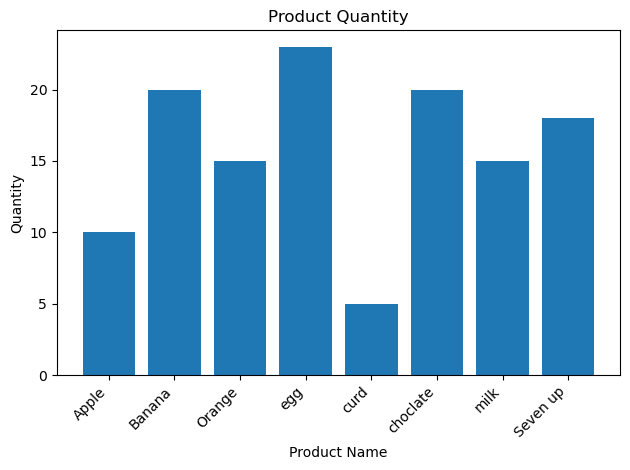

1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 4
Enter the ID of the product you want to delete: 5
Product deleted successfully.
1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 1
Available products:
        Name  Quantity  Price    Category
Id                                       
1      Apple        10  145.0      fruits
2     Banana        20   33.0      fruits
3     Orange        15   23.0      fruits
4        egg        23    7.0   groceries
6     Banana        20   33.0      fruits
7     Orange        15   23.0      fruits
8       curd         5   15.0   groceries
9   choclate        20   33.0      snacks
10      milk        15   23.0   groceries
11  Seven up        18   40.0  softdrinks
1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 5


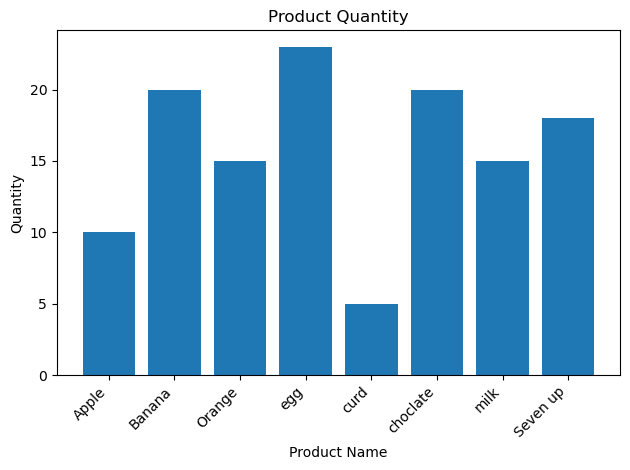

1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 6
Exiting shopkeeper mode.
Are you a shopkeeper or a customer? Enter '1.shopkeeper' or '2.customer' (Enter '3.exit' to quit):2
1. Display Products
2. Purchase Product
3. Finish Shopping and Generate Bill
Please select an option: 1
Available products:
        Name  Quantity  Price    Category
Id                                       
1      Apple        10  145.0      fruits
2     Banana        20   33.0      fruits
3     Orange        15   23.0      fruits
4        egg        23    7.0   groceries
6     Banana        20   33.0      fruits
7     Orange        15   23.0      fruits
8       curd         5   15.0   groceries
9   choclate        20   33.0      snacks
10      milk        15   23.0   groceries
11  Seven up        18   40.0  softdrinks
1. Display Products
2. Purchase Product
3. Finish Shopping and Generate Bill
Please select an option: 2
Enter the ID 

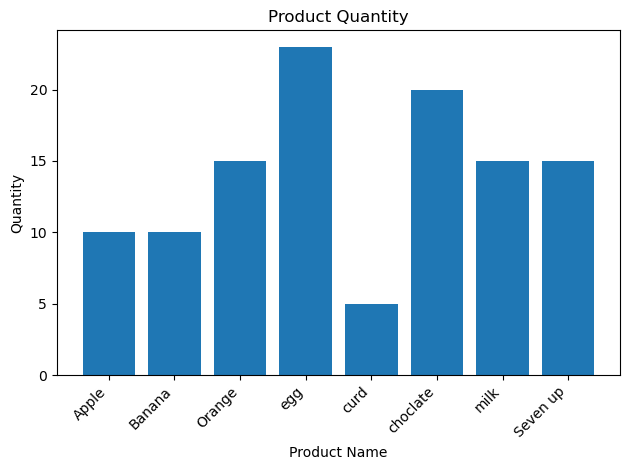

1. Display Products
2. Add Manually
3. Add From CSV
4. Delete Product
5. View Product Quantity Graph
6. Exit
Enter your choice: 6
Exiting shopkeeper mode.
Are you a shopkeeper or a customer? Enter '1.shopkeeper' or '2.customer' (Enter '3.exit' to quit):3
Exiting the program...


In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt

GST_RATES = {
    'groceries': 0.05,
    'softdrinks': 0.18,
    'fruits': 0.05,
    'snacks': 0.12
}

def load_items_from_csv(file_path):
    items = {}
    try:
        df = pd.read_csv(file_path)
        items = df.set_index('ID').to_dict(orient='index')
    except FileNotFoundError:
        print("File not found.")
    return items
    
def save_items_to_csv(file_path, items):
    df = pd.DataFrame.from_dict(items, orient='index').reset_index()
    df.rename(columns={'index': 'ID'}, inplace=True)
    df.to_csv(file_path, index=False)

def print_items(items):
    df = pd.DataFrame.from_dict(items, orient='index')
    df.index.name = 'Id'
    print(df)

def calculate_gst(category, price, quantity):
    if category in GST_RATES:
        gst_rate = GST_RATES[category]
        return gst_rate * price * quantity
    else:
        return 0.0

def add_product():
    name = input("Enter product name: ")
    quantity = int(input("Enter product quantity: "))
    price = float(input("Enter product price: "))
    category = input("Enter product category: ")
    items = load_items_from_csv('products.csv')

    if items:
        new_id = max(items.keys()) + 1
    else:
        new_id = 1

    items[new_id] = {'Name': name, 'Quantity': quantity, 'Price': price, 'Category': category}
    save_items_to_csv('products.csv', items)
    print("Product added successfully.")

def add_product_from_csv():
    file_name = input("Enter the CSV file name (with extension): ")
    file_path = f"{file_name}"
    if not os.path.exists(file_path):
        print("File not found.")
        return

    items = load_items_from_csv(file_path)
    if not items:
        print("No items found in the CSV.")
        return

    existing_items = load_items_from_csv('products.csv')
    max_id = max(existing_items.keys()) if existing_items else 0
    new_id = 0

    for item_id, item in items.items():
        new_id += 1
        existing_items[max_id + new_id] = item

    save_items_to_csv('products.csv', existing_items)
    print("Products added successfully.")

def delete_product():
    product_id = int(input("Enter the ID of the product you want to delete: "))
    items = load_items_from_csv('products.csv')
    if product_id in items:
        del items[product_id]
        save_items_to_csv('products.csv', items)
        print("Product deleted successfully.")
    else:
        print("Invalid product ID.")

def display_products():
    items = load_items_from_csv('products.csv')
    if items:
        print("Available products:")
        print_items(items)
    else:
        print("No products available.")

def purchase_product(purchase_records):
    product_id = int(input("Enter the ID of the product you want to purchase: "))
    items = load_items_from_csv('products.csv')
    if product_id in items:
        quantity_available = items[product_id]['Quantity']
        if quantity_available > 0:
            quantity_to_buy = int(input("Enter the quantity you want to purchase: "))
            if quantity_to_buy <= quantity_available:
                items[product_id]['Quantity'] -= quantity_to_buy
                save_items_to_csv('products.csv', items)
                product_name = items[product_id]['Name']
                price_per_item = items[product_id]['Price']
                total_price = price_per_item * quantity_to_buy
                gst_amount = calculate_gst(items[product_id]['Category'], price_per_item, quantity_to_buy)
                # Update the existing purchase record or add a new one
                if product_id in purchase_records:
                    # Update the existing purchase record
                    purchase_records[product_id]['Quantity'] += quantity_to_buy
                    purchase_records[product_id]['Total Price'] += (total_price + gst_amount)
                    purchase_records[product_id]['GST Amount'] += gst_amount
                else:
                    # Add a new purchase record
                    purchase_records[product_id] = {
                        'Product Name': product_name,
                        'Quantity': quantity_to_buy,
                        'Total Price': (total_price + gst_amount),
                        'GST Amount': gst_amount,
                        'Category': items[product_id]['Category'],
                        'Price': price_per_item  # Include the 'Price' column
                    }
            else:
                print("Insufficient quantity available.")
        else:
            print("Sorry, the product is out of stock.")
    else:
        print("Invalid product ID.")

def generate_bill(purchase_records):
    items = load_items_from_csv('products.csv')
    if not items:
        print("No products found.")
        return

    df_data = pd.DataFrame.from_dict(purchase_records, orient='index')
    df_data.reset_index(inplace=True)
    df_data.rename(columns={'index': 'Product ID'}, inplace=True)
    df_data['GST Amount'] = df_data.apply(lambda row: calculate_gst(row['Category'], row['Price'], row['Quantity']), axis=1)
    df_data['Total Price'] += df_data['GST Amount']  # Add GST to total price
    df_data = df_data[['Product ID', 'Product Name', 'Category', 'Quantity', 'Price', 'Total Price', 'GST Amount']]  # Include the 'Price' column
    df_data.to_csv('snack_record.csv', index=False)
    print("Bill generated and saved successfully.")
    print(df_data)

def view_product_quantity_graph():
    items = load_items_from_csv('products.csv')
    if items:
        product_names = [item['Name'] for item in items.values()]
        quantities = [item['Quantity'] for item in items.values()]

        plt.bar(product_names, quantities)
        plt.xlabel('Product Name')
        plt.ylabel('Quantity')
        plt.title('Product Quantity')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No products available.")

def shopkeeper():
    password = "1"
    pass_attempt = input("Enter password: ")
    if pass_attempt == password:
        print("Access granted.")
        while True:
            print("1. Display Products\n2. Add Manually\n3. Add From CSV\n4. Delete Product\n5. View Product Quantity Graph\n6. Exit")
            choice = input("Enter your choice: ")
            if choice == '6':
                print("Exiting shopkeeper mode.")
                break
            elif choice == '1':
                display_products()
            elif choice == '2':
                add_product()
            elif choice == '3':
                add_product_from_csv()
            elif choice == '4':
                delete_product()
            elif choice == '5':
                view_product_quantity_graph()
            else:
                print("Invalid choice.")
    else:
        print("Incorrect password. Access denied.")

def customer():
    purchase_records = {}  # Dictionary to store purchase records
    total_products_purchased = 0  # Initialize the total number of products purchased

    while True:
        print("1. Display Products\n2. Purchase Product\n3. Finish Shopping and Generate Bill")
        choice = input("Please select an option: ")
        if choice == '3':
            print("Finishing shopping...")
            break
        elif choice == '1':
            display_products()
        elif choice == '2':
            while True:
                purchase_product(purchase_records)
                total_products_purchased += 1  # Update the total quantity purchased
                choice = int(input("Do you want to purchase another product? (1.yes/2.no): "))
                if choice==1:
                    continue
                elif choice==2:
                    break
                else:
                    print("Invalid choice.")  
        else:
            print("Invalid choice.")

    if total_products_purchased > 0:
        generate_bill(purchase_records)
    else:
        print("No products purchased.")

def main():
    default_items = {
        1: {'Name': 'Apple', 'Quantity': 10, 'Price': 145, 'Category': 'fruits'},
        2: {'Name': 'Banana', 'Quantity': 20, 'Price': 33, 'Category': 'fruits'},
        3: {'Name': 'Orange', 'Quantity': 15, 'Price': 23, 'Category': 'fruits'}
    }
    save_items_to_csv('products.csv', default_items)

    while True:
        user_type = int(input("Are you a shopkeeper or a customer? Enter '1.shopkeeper' or '2.customer' (Enter '3.exit' to quit):"))
        if user_type == 1:
            shopkeeper()
        elif user_type == 2:
            customer()
        elif user_type == 3:
            print("Exiting the program...")
            break
        else:
            print("Invalid input. Please enter either 'shopkeeper' or 'customer'.")

if __name__ == "__main__":
    main()
